# Survival Statistics from the Titanic

This notebook uses the freely available dataset of passengers on the Titanic (titanic3.csv obtained from http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets) and explores how various documented factors such as class, gender, and age affect survival rates from the sinking of the Titanic passenger liner in 1912.

In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read titanic3.csv into a dataframe using pandas
titanicData = pd.read_csv('titanic3.csv')
titanicData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# Print column names
print titanicData.columns

Index([u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body',
       u'home.dest'],
      dtype='object')


# Survival rates by Class

The class (1st, 2nd, 3rd) is an approximate proxy for wealth, or socioeconomic class. The hypothesis is that more wealthy people, or those staying in first class, are more likely to survive.

In [4]:
survived_by_class = titanicData['survived'].groupby(titanicData['pclass'])

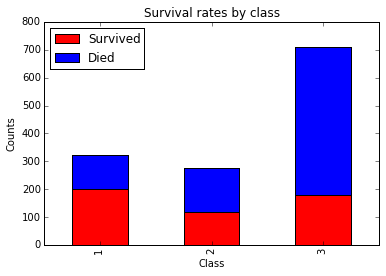

In [5]:
# Make stacked bar chart with number survived and number died per class

#number of passengers that survived and died by class
nSurvived = survived_by_class.sum()
nDied = survived_by_class.count() - nSurvived
nTotal = survived_by_class.count()
pSurvived = nSurvived/nTotal

pltsurvived = nSurvived.plot(kind = 'bar', color = 'r', label = 'Survived')
pltdied = nDied.plot(kind = 'bar', color = 'b', bottom= nSurvived, label = 'Died')
plt.ylabel('Counts')
plt.xlabel('Class')
plt.legend(loc = 'best')
plt.title('Survival rates by class')

This stacked bar chart shows the number of passengers in each class, as well as the proportion that survived and died. The passengers in first class fared the best, as expected. This stacked bar chart can be converted to survival rates, shown in the bar chart below.

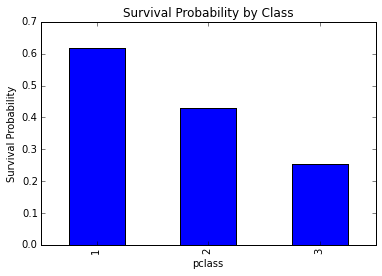

In [6]:
# Bar chart with probability of survival by class

plt_pSurvived = pSurvived.plot(kind = 'bar')
plt_pSurvived.set_ylabel('Survival Probability')
plt_pSurvived.set_title('Survival Probability by Class')

# Survival Rates by Gender

The "women and children first" policy for loading lifeboats is known to have caused a disproportionate number of men to have perished. This section shows the survival rates for women compared to men.

In [7]:
survived_by_gender = titanicData['survived'].groupby(titanicData['sex'])

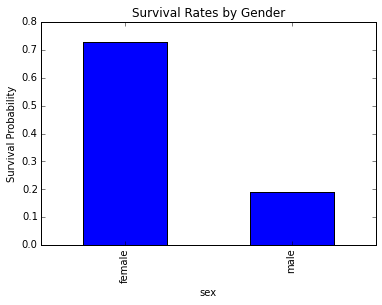

In [8]:
prob_survival_by_gender = survived_by_gender.sum()/survived_by_gender.count()
prob_survival_by_gender.plot(kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Survival Rates by Gender')

# Survival by Gender and Class

Let's now explore the combined effect of class and gender. In the table and bar charts below, we can see that 96% of first class women survived, while only 15% of third class men survived, highlighting that both these factors significantly affected survival rates.

In [9]:
gender_class_pivtable = titanicData.pivot_table(values=["survived"], index=["sex","pclass"], aggfunc=np.mean)
print gender_class_pivtable

               survived
sex    pclass          
female 1       0.965278
       2       0.886792
       3       0.490741
male   1       0.340782
       2       0.146199
       3       0.152130


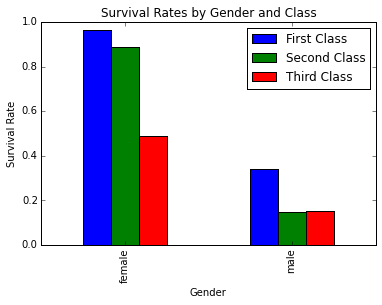

In [10]:
gc = gender_class_pivtable.unstack(level=-1)
sex_class_plot = gc.plot(kind='bar',stacked=False,title="Survival Rates by Gender and Class")
sex_class_plot.set_ylabel('Survival Rate')
sex_class_plot.set_xlabel('Gender')
sex_class_plot.legend(['First Class', 'Second Class', 'Third Class'])

Interestingly, third class women fared better than first class men.

# Survival Rates by Age

Were children indeed favored in rescue from the Titanic? Let's see how survival rates vary by age. The table and histogram below shows descriptive statistics about the passengers aboard (not just those who survived). The middle 50% of passengers have a spread of only 18 years -- most passengers were in their 20s-30s. 

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64


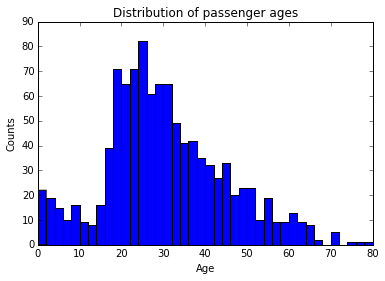

In [11]:
# Descriptive statistics about the ages of the passengers on board, and
# Histogram of ages of passengers
print titanicData.age.describe()
plt.hist(titanicData.age, bins = 40, range = (0,80))
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Distribution of passenger ages')

The above plot shows a histogram of all passengers. The breakdown of those who survived and died is shown below. Interestingly, the oldest passengers aboard were saved at the expense of many children and young adults (though the represented only a tiny fraction of those saved).

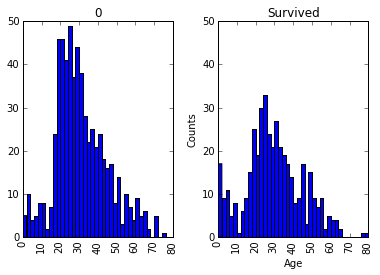

In [50]:
titanicData.hist(column='age',by='survived',bins=40, range = (0,80), sharex = True)
plt.ylim([0,50])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title("Survived")
# Having trouble labeling the first subplot, which is the histogram of ages for people who died

In [13]:
# Average ages of those who survived and died
survived_by_age = titanicData['age'].groupby(titanicData['survived'])
print survived_by_age.aggregate(np.mean)

survived
0    30.545363
1    28.918244
Name: age, dtype: float64


The statistics above show that the average age of people who survived is slightly lower than those who died, since children under 10 were favored for saving. The table below shows the breakdown of survival rate by both age and passenger class. The survival rate is highest for the youngest across classes (though the 10-20 age bracket is slightly favored over the 0-10 for first class). The data is visualized in the bar chart below.

In [14]:
age_bins = [0,10,20,30,40,50,60,70,80]
binned_ages = pd.cut(titanicData['age'],age_bins)
#pd.value_counts(binned_ages, sort=False)

In [15]:
age_class_pivtable = titanicData.pivot_table(values=["survived"], index=[binned_ages,"pclass"], aggfunc=np.mean)
t= age_class_pivtable.unstack(level=-1)
print t

          survived                    
pclass           1         2         3
age                                   
(0, 10]   0.750000  1.000000  0.416667
(10, 20]  0.818182  0.515152  0.271028
(20, 30]  0.698413  0.386139  0.258883
(30, 40]  0.712121  0.400000  0.224719
(40, 50]  0.538462  0.400000  0.135135
(50, 60]  0.651163  0.142857  0.000000
(60, 70]  0.235294  0.166667  0.250000
(70, 80]  0.500000       NaN  0.000000


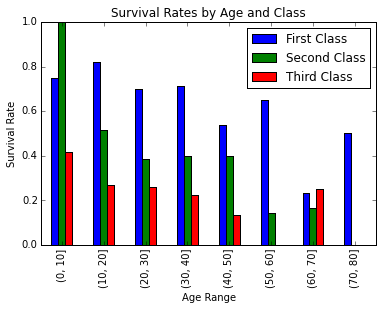

In [16]:
age_class_plot = t.plot(kind='bar',stacked=False,title="Survival Rates by Age and Class")
age_class_plot.set_ylabel('Survival Rate')
age_class_plot.set_xlabel('Age Range')
age_class_plot.legend(['First Class', 'Second Class', 'Third Class'])

# Names

This section explores the first letters of the last names of the passengers and their relative survival rates to get some practice working with strings.

In [105]:
# make all names lower case
def lower(x):
    return x.lower()

print titanicData['name'].apply(lower).head()

0                      allen, miss. elisabeth walton
1                     allison, master. hudson trevor
2                       allison, miss. helen loraine
3               allison, mr. hudson joshua creighton
4    allison, mrs. hudson j c (bessie waldo daniels)
Name: name, dtype: object


In [106]:
survival_by_name = titanicData['survived'].groupby(titanicData['name'].apply(lower).str.get(0))
sbn_sum = survival_by_name.sum()
sbn_count = survival_by_name.count()
sbn_ratio = survival_by_name.sum()/survival_by_name.count()


First, this is the distribution of last name first letters for all passengers.

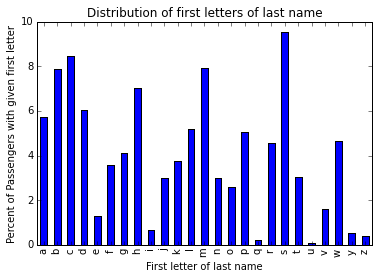

In [107]:
name_distribution = (survival_by_name.count()/sum(survival_by_name.count()))*100
name_distribution.plot(kind = 'bar')
plt.ylabel('Percent of Passengers with given first letter')
plt.xlabel('First letter of last name')
plt.title('Distribution of first letters of last name')

#Note: There are no X's!

Now, this graph shows survival rates for passengers with different last name beginnings. The Qs did very well; the Us and the Zs did not.

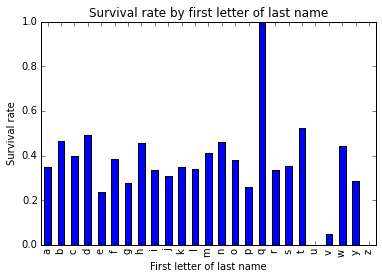

In [108]:
name_pivtable = titanicData.pivot_table(values=["survived"], index=titanicData['name'].apply(lower).str.get(0))
name_pivtable.plot(kind = 'bar', legend = False)
plt.xlabel('First letter of last name')
plt.ylabel('Survival rate')
plt.title('Survival rate by first letter of last name')

# it appears that, except for Q, first letter of last name is relatively uncorrelated with survival.

For the cases where the survival rate is close to 100% or 0%, it is because the total population was low. Let's look at this data represented in such a way that we can see survival rate and number of instances on the same graph.

[-2, 140, -0.1, 1.1]

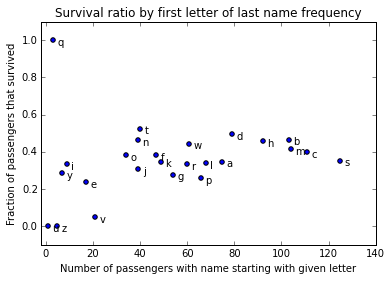

In [121]:
# Same data, but all on the same plot!

letters = str.split('a b c d e f g h i j k l m n o p q r s t u v w y z')
plt.scatter(sbn_count, sbn_ratio)
for letter, name_count, probability in zip(letters, sbn_count, sbn_ratio):
    plt.annotate(letter,
                xy = (name_count, probability),
                xytext = (5, -5),
                textcoords = 'offset points')
plt.title("Survival ratio by first letter of last name frequency")
plt.xlabel("Number of passengers with name starting with given letter")
plt.ylabel("Fraction of passengers that survived")
plt.axis([-2,140, -0.1,1.1])

This graph whos that for first letters that occurred for most than ~30 people, the survival rate is relatively flat. Let's change this plot so that we look at the deviation from the mean survival rate.

[-2, 140, -0.6, 0.7]

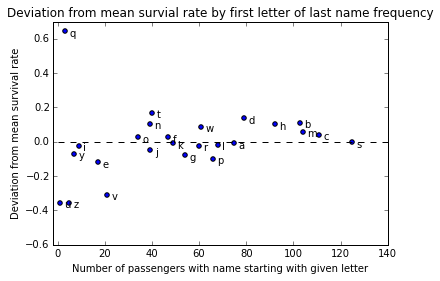

In [122]:
# deviation from mean, by first letter of last name
mean_survivalrate = np.mean(sbn_ratio)

plt.scatter(sbn_count, sbn_ratio - mean_survivalrate)
for letter, name_count, probability in zip(letters, sbn_count, sbn_ratio-mean_survivalrate):
    plt.annotate(letter,
                xy = (name_count, probability),
                xytext = (5, -5),
                textcoords = 'offset points')
plt.plot((0, 140), (0, 0), 'k--')
plt.title("Deviation from mean survial rate by first letter of last name frequency")
plt.xlabel("Number of passengers with name starting with given letter")
plt.ylabel("Deviation from mean survival rate")
plt.axis([-2,140, -0.6,0.7])

Were all the Q's female, and the U's male? Can gender explain why some letters survived at higher frequency? 

In [78]:
name_gender_class_tuple = zip(titanicData['name'].apply(lower).str.get(0), titanicData['sex'], titanicData['pclass'])

for name, gender, pclass in name_gender_class_tuple:
    if name == 'q': print gender, pclass

female 2
female 2
female 2


Above: the Q's were indeed female, and in second class. Below: the only U was indeed male, and died despite being in first class. 

In [79]:
for name, gender, pclass in name_gender_class_tuple:
    if name == 'u': print gender, pclass

male 1


Let's try to understand more broadly for the letters that appear with low frequency if their deviation from the mean can be explained by the gender distribution within the letter. Printed below are the letters with less than 35 counts on board, which show the greatest deviation from the mean.

In [140]:
infrequent_letters = []
for letter, name_count in zip(letters, sbn_count):
    if name_count < 35:
        infrequent_letters.append(letter)
print infrequent_letters

['e', 'i', 'o', 'q', 'u', 'v', 'y', 'z']


In [222]:
names = titanicData['name'].apply(lower).str.get(0)
survived_name_gender_table = titanicData.pivot_table(values=["survived"], columns=[names,titanicData['sex']], aggfunc = np.mean)

In [ ]:
# Having trouble extracting just the rows where the name is one of the infrequent letters

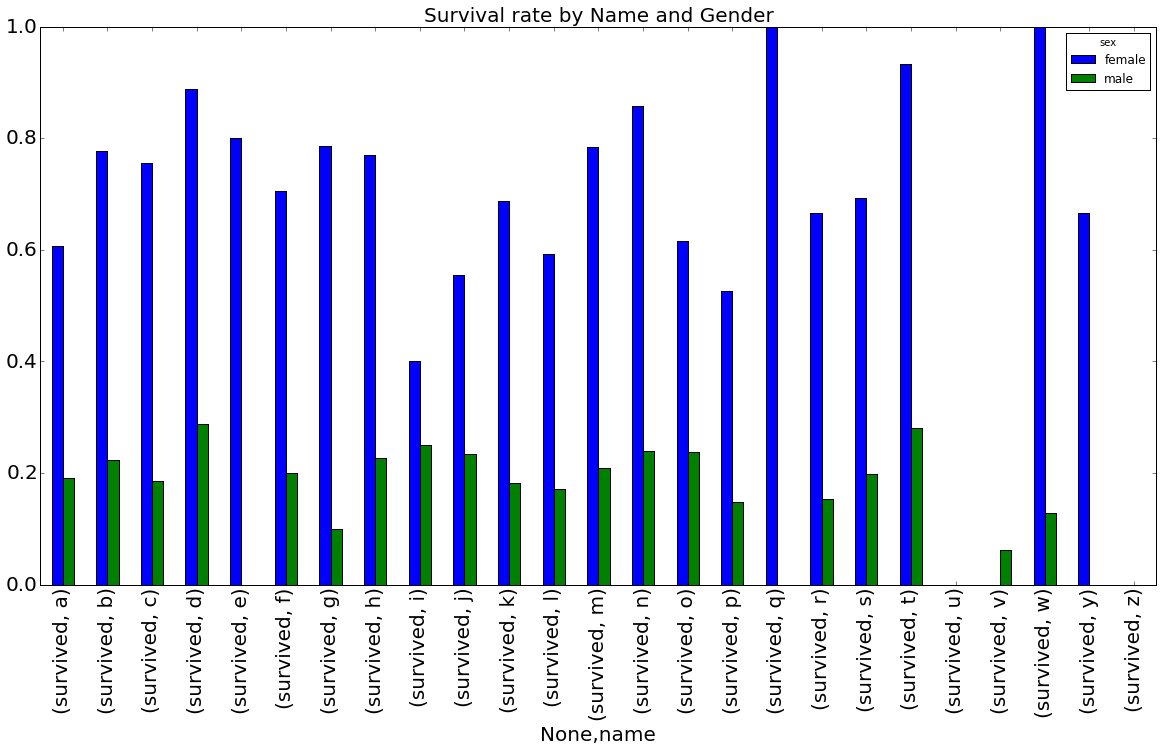

In [225]:
sngt = survived_name_gender_table.unstack(level = -1)
acp = sngt.plot(kind='bar',stacked=False, figsize = (20,10), title = "Survival rate by Name and Gender")
for item in ([acp.title, acp.xaxis.label, acp.yaxis.label] +
             acp.get_xticklabels() + acp.get_yticklabels()):
    item.set_fontsize(20)

Looking at letters u, v, e, z, q, which have notably lower or higher survival rates than the average based on the labeled scatter plot above, we can see that, for example, all the Q's are women (as were all the surviving E's and Y's), while U, V, ans Z had no survivors of either gender.

# Family Relationships

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64

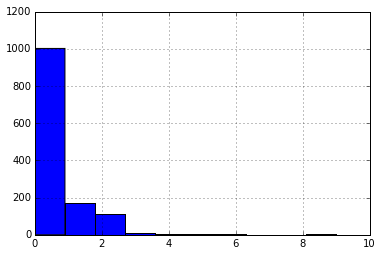

In [29]:
# Distribution of people with parents/children aboard
titanicData['parch'].hist()
titanicData.parch.describe()
# most people had no parents/children on board

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b558850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b75af10>], dtype=object)

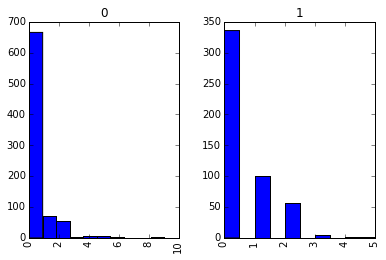

In [30]:
titanicData['parch'].hist(by=titanicData['survived'])

In [38]:
# Did those with parents/children aboard disproportionately survive?

parch_pivtable = titanicData.pivot_table(values=["survived"], index=titanicData['parch'])
print parch_pivtable

       survived
parch          
0      0.335329
1      0.588235
2      0.504425
3      0.625000
4      0.166667
5      0.166667
6      0.000000
9      0.000000


It seems that those with small families on board (parch value = 1-3) were more likely to survive than those with no relations, but those with larger families were less likely to survive.